# Computer Vision color spaces

### Import statements

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

-1

### To edit an image making a copy of it is always a good idea!

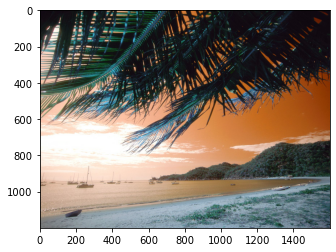

In [3]:
# Load an image
# And make a copy of the original image to avoid manipulating the original image
img = cv2.imread('img.jpg')
copy_img= img.copy()

#Show the image with matplotlib
plt.imshow(img)
plt.show()

[Hint](# "Numpy .copy function") 

## Color Spaces

### BGR Spliting the color channels

In [5]:
# Load a color image and split in is different B, G and R channels
B,G,R= cv2.split(img)
B

array([[ 18,  22,  24, ...,  25,  26,  26],
       [ 17,  20,  19, ...,  17,  17,  17],
       [ 15,  16,  16, ...,  16,  15,  14],
       ...,
       [119, 122, 123, ...,  70,  63,  52],
       [108, 113, 114, ...,  66,  64,  55],
       [ 97, 104, 107, ...,  68,  72,  68]], dtype=uint8)

[Hint](# "cv2.split") 

In [26]:
# Show each channel channel on screen
def view(image, name_of_window="window"):
    cv2.namedWindow(name_of_window, cv2.WINDOW_NORMAL)
    cv2.imshow(name_of_window, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
view(B, "B")


In [7]:
view(R, "R")

#### Merging the color channels

In [11]:
# Modify a channel and then merge them all again
G= cv2.add(G,-50)
view(cv2.merge([R,G,B]), "RGB")

In [17]:
img.shape

(1200, 1600, 3)

[Hint](# "cv2.merge") 

In [30]:
# Create a black canvas with the same size as the image you loaded
shape= img.shape
cv2.rectangle(img,(0,1200),(0,1600), (0, 0, 0), -1)
black= img.copy()
black[:,:,:]= 0
view(black)

[Hint](# "use numpy np.zeros function with the img.shape[:2]") 

In [60]:
# Merge each channel with the black canvas 
# So you will end up with 3 images: (Red,Black,Black), (Black,Green,Black) and (Black,Black,Blue) 
# Assuming you are working with RGB, but BGR is also fine
lol= img.copy()
black = np.zeros(R.shape).astype('uint8')
red_black = cv2.merge([ black, black,R])
green_black = cv2.merge([black, G, black])
blue_black = cv2.merge([B,black, black])



In [61]:
view(red_black)

In [62]:
view(green_black)

In [ ]:
opacity= 0.6
merged= cv2.addWeighted(lol, opacity, black, 1-opacity, 0.0)
view(merged)

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-47-2e0b767cfb5e>, line 2)

[Hint](# "cv2.merge") 

### HSV: Hue Saturation Value

#### M&Ms challenge!

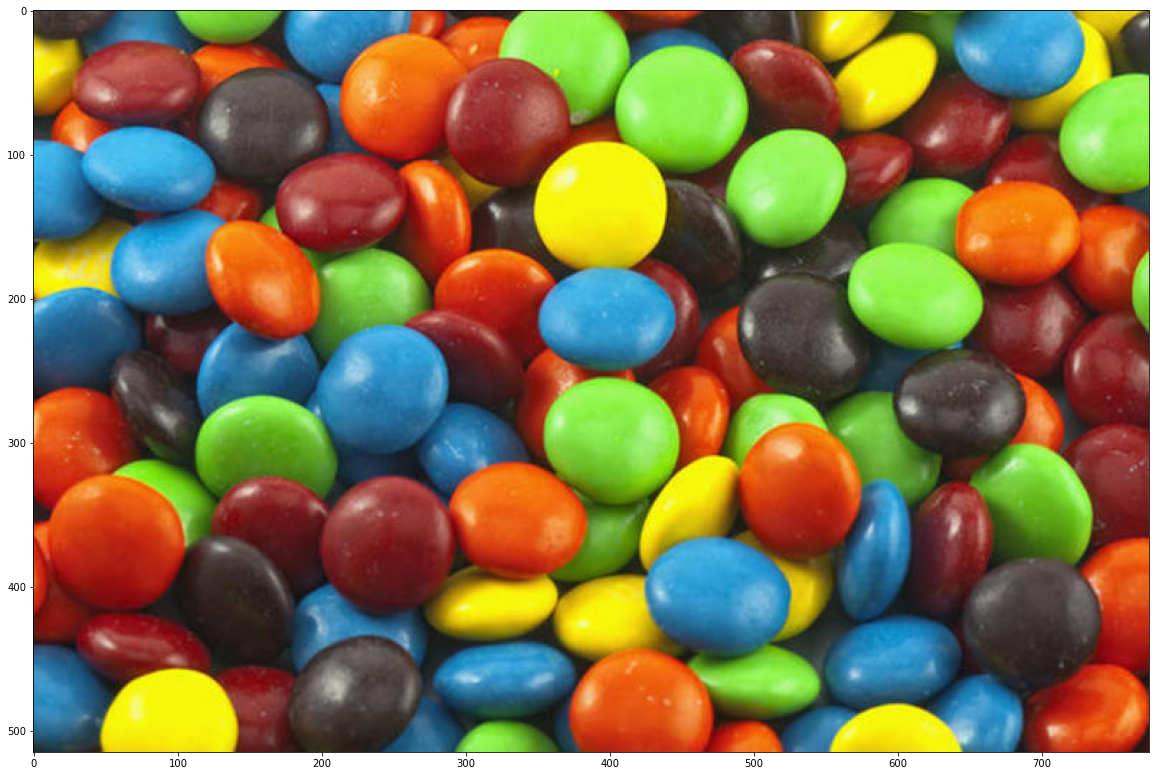

In [48]:
# Use the image below and convert it from BGR to HSV
img = cv2.imread('img/m.jpg')
plt.figure(figsize = (20,15));
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));

In [50]:
# Split the H,S and V channels 
hsv= cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

[Hint](# "cv2.cvtColor") 

In [74]:
# Create a mask to filter out the Blue M&Ms (remember you need a lower and upper range)
# Make a copy of the hsv image and apply the mask to it, then display the image
lower = (90, 20, 0)
upper = (130, 255, 255)
mask= cv2.inRange(hsv, lower,upper)
masked= hsv.copy()
masked[mask==0]= [0,0,0]

view(masked)

[Hint](# "cv2.inRange") 

In [75]:
# Repeat the same but now with the greens
lower = (40, 100, 20)
upper = (130, 255, 255)
mask= cv2.inRange(hsv, lower,upper)
masked= hsv.copy()
masked[mask==0]= [0,0,0]

view(masked)

In [ ]:
# Now combine both masks togheter so we can see all greens and blues in the same image!


In [ ]:
# Now lets combine both masks but also some opacity, we want to be able to see all M&Ms but
# Blues and greens will show as int he image above while the other colors will be faded out with some opacity
# You just need to add alpha to apply opacity to the dark parts of the mask, then display the image



[Hint](# "cv2.addWeighted") 

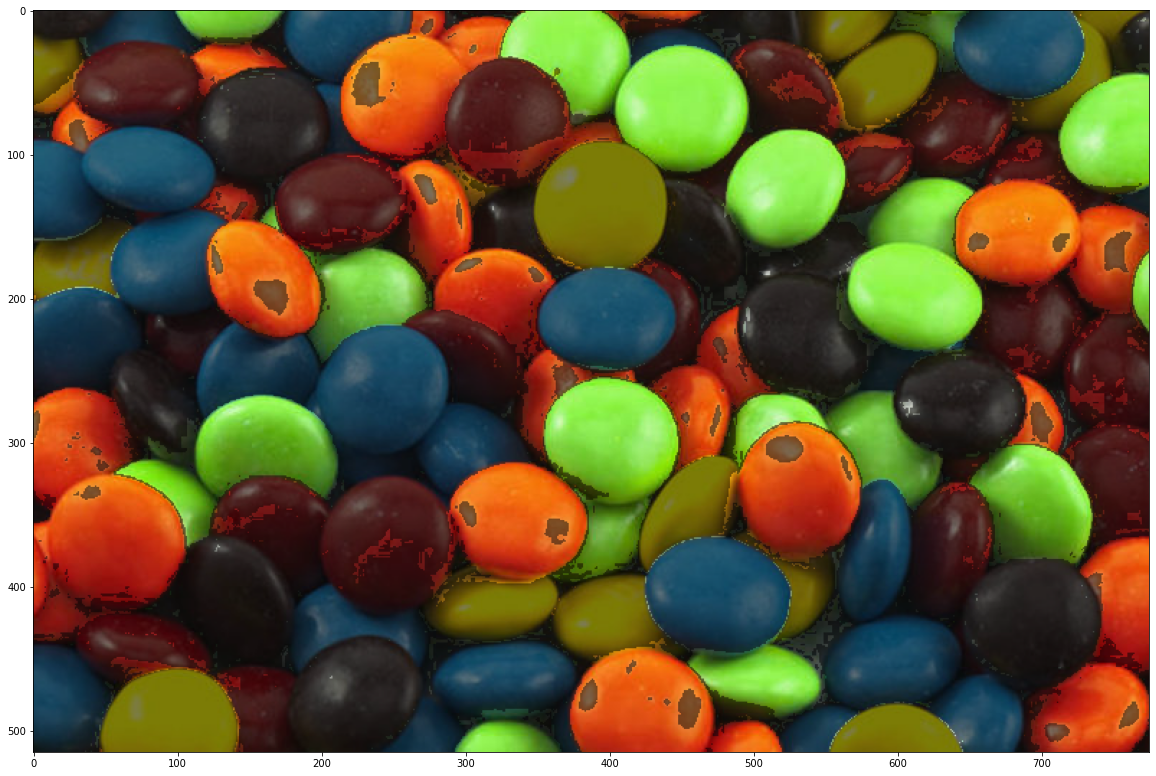

In [9]:
# Below you will find an example with oranges and greens just for reference so you can see what we want to accomplish
# In this example the oranges are not perfect, and it can be improved a lot easily.

## Mini project

### Level 1

#### Ball tracker

1. Given an image with a ball on it isolate the ball

### Level 2

#### Ball tracker

1. Make it track a ball in real time (either with a video or a webcam)

### Level 3

#### Ball Tracker

1. Can you make it track two or more different color balls at the same time?